In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#import pyexcel as pe
#import pyexcel.ext.xlsx

In [12]:
 records = pd.read_excel("functional_tkt.xlsx")

In [13]:
d = pd.DataFrame(records)

In [14]:
d1 = pd.DataFrame(d, columns = ["Open Year","Open Date of Month", "Open Month", "Area / Category Level 1", "Weeks Open",
                                "Root Cause","Priority"])

In [15]:
d1.head()

,Open Year,Open Date of Month,Open Month,Area / Category Level 1,Weeks Open,Root Cause,Priority
0,2015,20,4,SAP,0.179297,SAP-BreakFix-Transactional Data,3 - Medium
1,2015,20,4,SAP,0.040344,SAP-Basis-System Unavailable,2 - High
2,2015,20,4,SAP,0.397072,NaN,3 - Medium
3,2015,20,4,SAP,0.314815,SAP-BreakFix-Transactional Data,3 - Medium
4,2015,20,4,SAP,1.453161,NaN,2 - High


In [16]:
d1["date"] = d["Open Year"].astype(str) + '-' + d1["Open Month"].astype(str) + '-' + d1["Open Date of Month"].astype(str).map(str)

In [17]:
d1.head()

,Open Year,Open Date of Month,Open Month,Area / Category Level 1,Weeks Open,Root Cause,Priority,date
0,2015,20,4,SAP,0.179297,SAP-BreakFix-Transactional Data,3 - Medium,2015-4-20
1,2015,20,4,SAP,0.040344,SAP-Basis-System Unavailable,2 - High,2015-4-20
2,2015,20,4,SAP,0.397072,NaN,3 - Medium,2015-4-20
3,2015,20,4,SAP,0.314815,SAP-BreakFix-Transactional Data,3 - Medium,2015-4-20
4,2015,20,4,SAP,1.453161,NaN,2 - High,2015-4-20


In [18]:
for i in np.arange(0,len(d1["Priority"])):
    d1["Priority"][i]=d1["Priority"].str.split(" - ")[i][0]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
d1.head()

,Open Year,Open Date of Month,Open Month,Area / Category Level 1,Weeks Open,Root Cause,Priority,date
0,2015,20,4,SAP,0.179297,SAP-BreakFix-Transactional Data,3,2015-4-20
1,2015,20,4,SAP,0.040344,SAP-Basis-System Unavailable,2,2015-4-20
2,2015,20,4,SAP,0.397072,NaN,3,2015-4-20
3,2015,20,4,SAP,0.314815,SAP-BreakFix-Transactional Data,3,2015-4-20
4,2015,20,4,SAP,1.453161,NaN,2,2015-4-20


In [20]:
d1.tail()

,Open Year,Open Date of Month,Open Month,Area / Category Level 1,Weeks Open,Root Cause,Priority,date
4838,2015,19,7,Security,0.081288,NaN,2,2015-7-19
4839,2015,19,7,SAP,0.026486,SAP-BreakFix-Transactional Data,2,2015-7-19
4840,2015,19,7,SAP,0.045552,SAP-BreakFix-Transactional Data,3,2015-7-19
4841,2015,19,7,SAP,0.075473,NaN,3,2015-7-19
4842,2015,19,7,SAP,0.063198,NaN,2,2015-7-19


In [21]:
d1.dtypes

Open Year                    int64
Open Date of Month           int64
Open Month                   int64
Area / Category Level 1     object
Weeks Open                 float64
Root Cause                  object
Priority                    object
date                        object
dtype: object

In [22]:
d2 = pd.DataFrame(d1, columns = ["Area / Category Level 1","Root Cause","Priority", "Weeks Open","date"])

In [23]:
d2.groupby("Area / Category Level 1").mean().head()

,Weeks Open
Area / Category Level 1,
Channel IT,1.142621
Communications,7.157844
Computer Hardware,3.444105
EAME,1.423591
EDS,2.309443


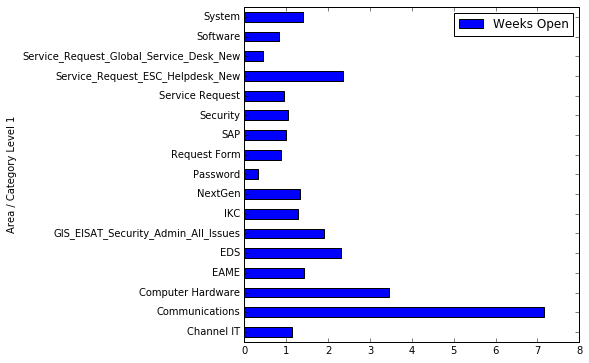

In [24]:
d2.groupby("Area / Category Level 1").mean().plot(kind = "barh",figsize=(6,6))

In [25]:
d2.groupby("Root Cause").mean().head()

,Weeks Open
Root Cause,
EDS.EDS - Office,6.035822
External System,0.459834
IC - Flagged for Review,0.050968
IC - Reviewed and Bypassed,1.015069
IC - Reviewed and Tracked,0.009096


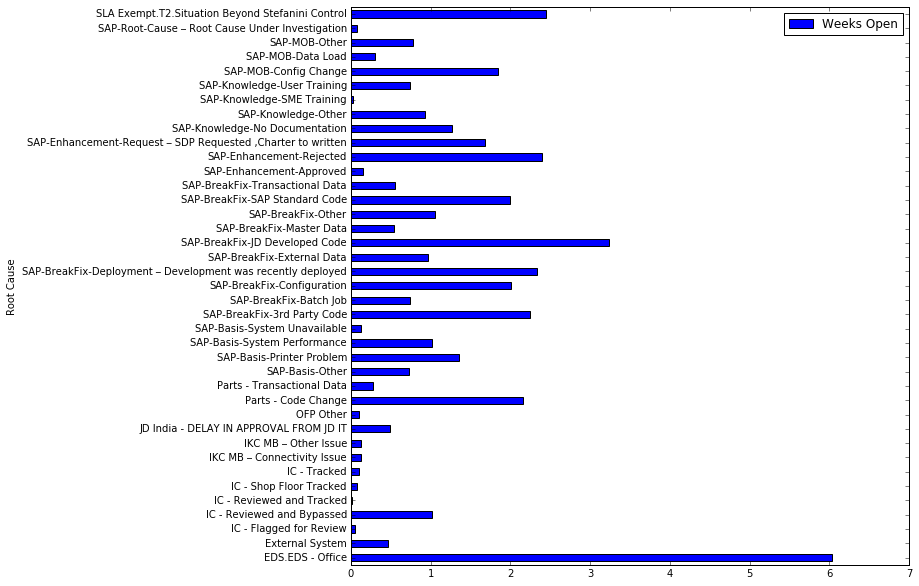

In [26]:
d2.groupby("Root Cause").mean().plot(kind = "barh",figsize=(10,10))

In [27]:
d2["Area / Category Level 1"].value_counts()

SAP                                        4244
Channel IT                                  138
Security                                    136
NextGen                                     133
Request Form                                 83
Software                                     58
GIS_EISAT_Security_Admin_All_Issues          34
Service Request                               3
Computer Hardware                             2
IKC                                           2
Service_Request_ESC_Helpdesk_New              2
EDS                                           2
Communications                                1
EAME                                          1
System                                        1
Password                                      1
Service_Request_Global_Service_Desk_New       1
Name: Area / Category Level 1, dtype: int64

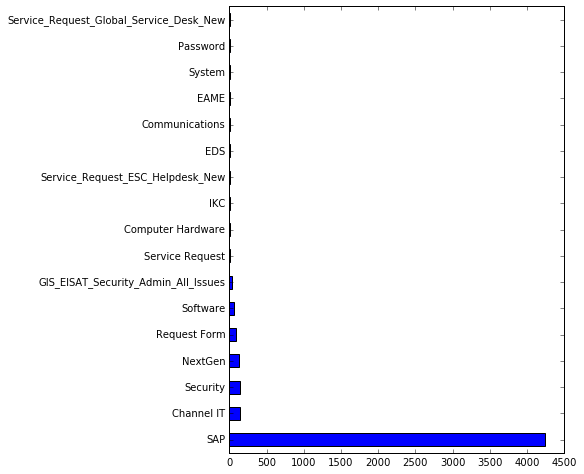

In [28]:
d2["Area / Category Level 1"].value_counts().plot(kind = "barh",figsize=(6,8))

In [29]:
d2["Root Cause"].value_counts()

SAP-BreakFix-Transactional Data                                1462
SAP-BreakFix-Other                                              990
SAP-BreakFix-Master Data                                        507
SAP-MOB-Other                                                   219
SAP-BreakFix-Batch Job                                          195
SAP-BreakFix-Configuration                                      139
SAP-BreakFix-JD Developed Code                                  103
SAP-MOB-Data Load                                                56
SAP-Knowledge-Other                                              43
SAP-Knowledge-User Training                                      43
SAP-MOB-Config Change                                            41
SAP-BreakFix-External Data                                       41
Parts - Transactional Data                                       33
SAP-Basis-Other                                                  28
SAP-Basis-System Performance                    

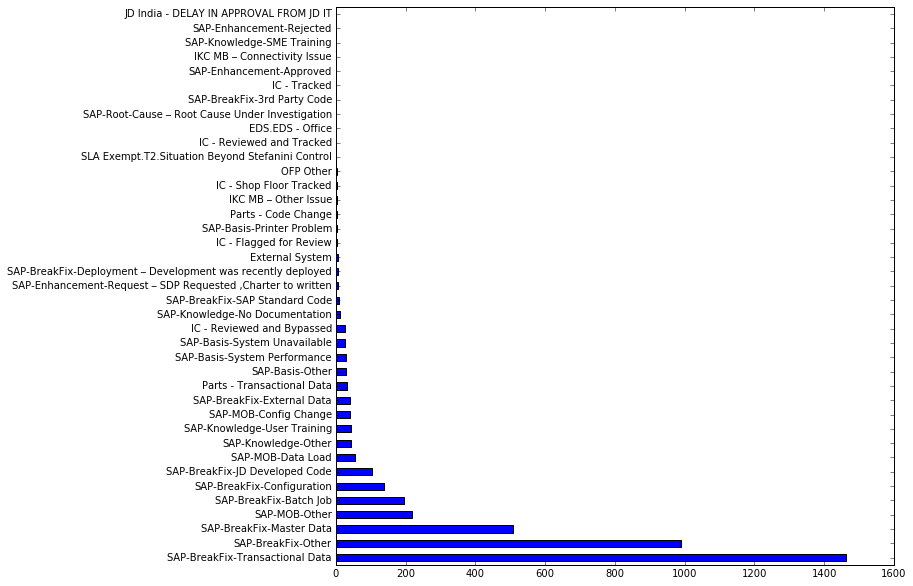

In [30]:
d2["Root Cause"].value_counts().plot(kind = "barh",figsize=(10,10))

In [31]:
d2["Priority"].value_counts()

3    3611
2    1078
5      77
1      65
4      10
0       2
Name: Priority, dtype: int64

In [32]:
d2.groupby("Priority").mean()

,Weeks Open
Priority,
0,1.435889
1,0.061615
2,0.412225
3,1.116217
4,2.319808
5,4.706244


<Container object of 6 artists>

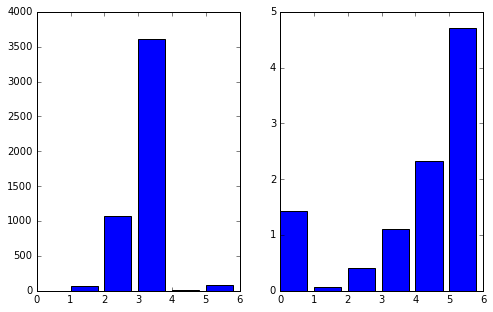

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(8,5))
axs[0].bar(d2["Priority"].value_counts().index, d2["Priority"].value_counts().values)
axs[1].bar(d2.groupby("Priority").mean().index, d2.groupby("Priority").mean().values)

In [34]:
freq2 = {}
for i in d2.groupby("date").sum().index:
     for j in d2.date:
            if (j==i):
                freq2[i] = freq2.get(j, 0) + 1

In [35]:
freq2

{'2015-4-20': 81,
 '2015-4-21': 74,
 '2015-4-22': 71,
 '2015-4-23': 84,
 '2015-4-24': 88,
 '2015-4-25': 1,
 '2015-4-26': 4,
 '2015-4-27': 66,
 '2015-4-28': 88,
 '2015-4-29': 61,
 '2015-4-30': 65,
 '2015-5-1': 45,
 '2015-5-10': 6,
 '2015-5-11': 69,
 '2015-5-12': 86,
 '2015-5-13': 78,
 '2015-5-14': 59,
 '2015-5-15': 52,
 '2015-5-16': 3,
 '2015-5-17': 10,
 '2015-5-18': 75,
 '2015-5-19': 81,
 '2015-5-2': 2,
 '2015-5-20': 66,
 '2015-5-21': 72,
 '2015-5-22': 59,
 '2015-5-23': 6,
 '2015-5-24': 5,
 '2015-5-25': 25,
 '2015-5-26': 59,
 '2015-5-27': 72,
 '2015-5-28': 87,
 '2015-5-29': 68,
 '2015-5-3': 4,
 '2015-5-30': 4,
 '2015-5-31': 6,
 '2015-5-4': 71,
 '2015-5-5': 79,
 '2015-5-6': 88,
 '2015-5-7': 80,
 '2015-5-8': 74,
 '2015-5-9': 10,
 '2015-6-1': 71,
 '2015-6-10': 74,
 '2015-6-11': 60,
 '2015-6-12': 73,
 '2015-6-13': 2,
 '2015-6-14': 9,
 '2015-6-15': 77,
 '2015-6-16': 104,
 '2015-6-17': 90,
 '2015-6-18': 80,
 '2015-6-19': 65,
 '2015-6-2': 65,
 '2015-6-20': 6,
 '2015-6-21': 1,
 '2015-6-22': 72

In [36]:
p1 = pd.DataFrame(list(freq2.items()), columns = ["Date", "Tickets"])

In [37]:
p1 = p1.sort_values(by = "Date")

In [38]:
p1.head()

,Date,Tickets
79,2015-4-20,81
29,2015-4-21,74
75,2015-4-22,71
80,2015-4-23,84
45,2015-4-24,88


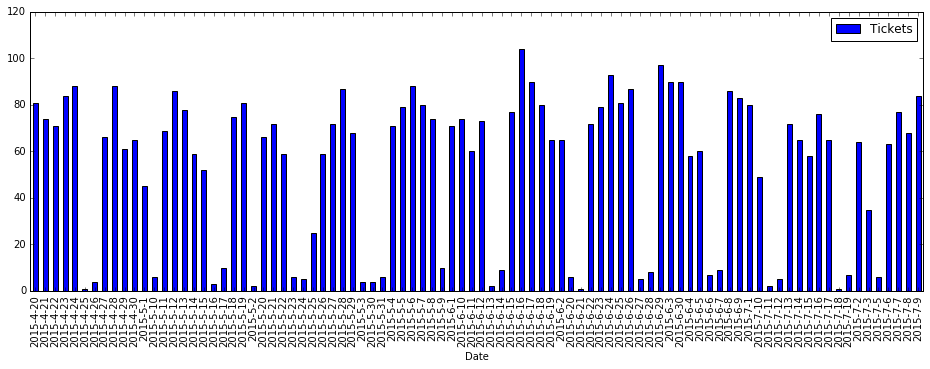

In [39]:
p1.plot(kind= "bar", x= "Date", y = "Tickets", figsize = (16,5))

In [40]:
p2 = p1.copy()

In [41]:
p2.head()

,Date,Tickets
79,2015-4-20,81
29,2015-4-21,74
75,2015-4-22,71
80,2015-4-23,84
45,2015-4-24,88


In [42]:
p2.Date = pd.DatetimeIndex(p2.Date)

In [43]:
p2.dtypes

Date       datetime64[ns]
Tickets             int64
dtype: object

In [44]:
p2["timeIndex"] = p2.Date - p2.Date.min()

In [45]:
p2.head()

,Date,Tickets,timeIndex
79,2015-04-20,81,0 days
29,2015-04-21,74,1 days
75,2015-04-22,71,2 days
80,2015-04-23,84,3 days
45,2015-04-24,88,4 days


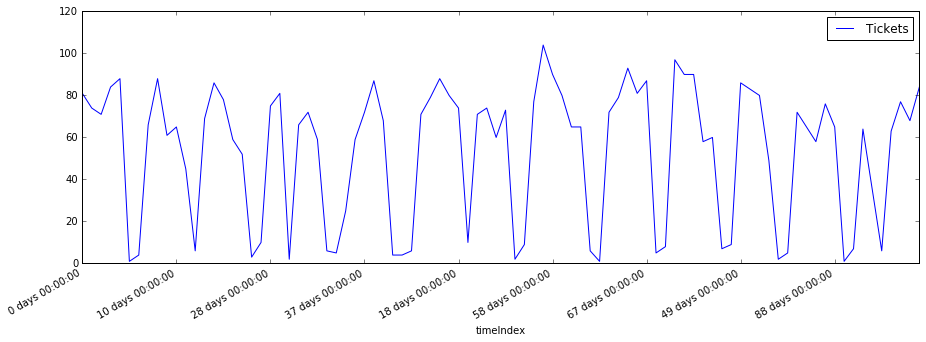

In [46]:
p2.plot(x= "timeIndex",  y = "Tickets", figsize= (15,5))

In [47]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

In [48]:
p2["timeIndex"] =  p2["timeIndex"]/np.timedelta64(1, 'M')

In [49]:
p2.timeIndex.astype(np.float64).head()

79    0.000000
29    0.032855
75    0.065710
80    0.098565
45    0.131420
Name: timeIndex, dtype: float64

In [50]:
p2.dtypes

Date         datetime64[ns]
Tickets               int64
timeIndex           float64
dtype: object

In [51]:
model_linear = smf.ols('Tickets ~ timeIndex', data = p2).fit()

In [52]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tickets   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.1563
Date:                Sun, 03 Apr 2016   Prob (F-statistic):              0.694
Time:                        07:26:22   Log-Likelihood:                -440.85
No. Observations:                  90   AIC:                             885.7
Df Residuals:                      88   BIC:                             890.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     56.1402      6.831      8.218      0.000        42.565    69.715
timeIndex     -1.5871      4.014     -0.395      0.694        -9.565     6.390
==============================================================================
Omnibus:                       34.785   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.000
Skew:                          -0.609   Prob(JB):                      0.00409
Kurtosis:                       1.796   Cond. No.                         4.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
model_linear.params

Intercept    56.140207
timeIndex    -1.587098
dtype: float64

In [54]:
c = model_linear.params[0]
m = model_linear.params[1]

In [55]:
model_linear_pred = model_linear.predict()

In [56]:
model_linear_pred

array([ 56.14020685,  56.08806292,  56.03591898,  55.98377505,
        55.93163111,  55.87948718,  55.82734324,  55.77519931,
        55.72305538,  55.67091144,  55.61876751,  55.56662357,
        55.09732816,  55.04518423,  54.99304029,  54.94089636,
        54.88875242,  54.83660849,  54.78446456,  54.73232062,
        54.68017669,  54.62803275,  55.51447964,  54.57588882,
        54.52374488,  54.47160095,  54.41945701,  54.36731308,
        54.31516914,  54.26302521,  54.21088128,  54.15873734,
        54.10659341,  55.4623357 ,  54.05444947,  54.00230554,
        55.41019177,  55.35804783,  55.3059039 ,  55.25375997,
        55.20161603,  55.1494721 ,  53.9501616 ,  53.48086619,
        53.42872226,  53.37657832,  53.32443439,  53.27229045,
        53.22014652,  53.16800259,  53.11585865,  53.06371472,
        53.01157078,  53.89801767,  52.95942685,  52.90728291,
        52.85513898,  52.80299504,  52.75085111,  52.69870718,
        52.64656324,  52.59441931,  52.54227537,  52.49

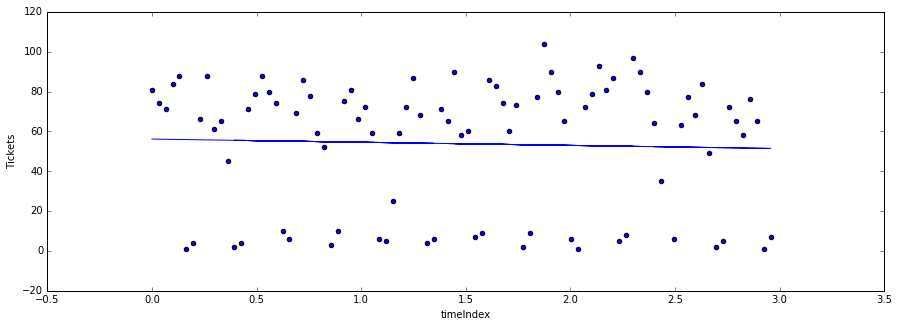

In [57]:
p2.plot( kind = "scatter", x="timeIndex", y = "Tickets", figsize= (15,5))
plt.plot(p2.timeIndex,model_linear_pred, '-')

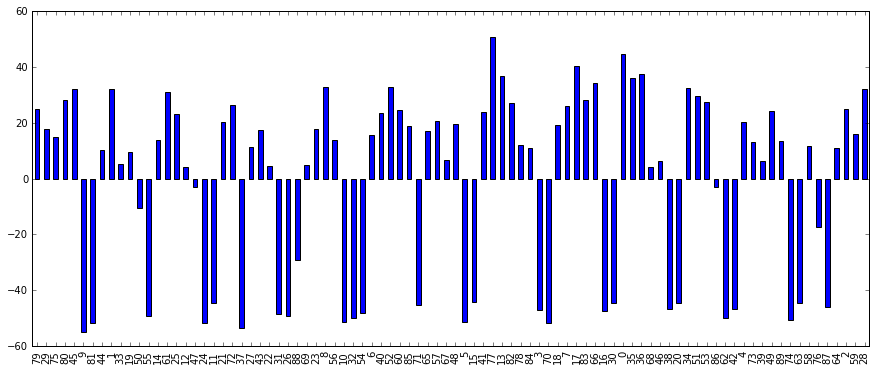

In [58]:
model_linear.resid.plot(kind = "bar", figsize = (15,6))

### First Differencing 

In [59]:
p2["TicketsShift1"] = p2.Tickets.shift()
p2["TicketsDiff"] = p2.Tickets - p2.TicketsShift1

In [60]:
p2.head()

,Date,Tickets,timeIndex,TicketsShift1,TicketsDiff
79,2015-04-20,81,0.000000,NaN,NaN
29,2015-04-21,74,0.032855,81,-7
75,2015-04-22,71,0.065710,74,-3
80,2015-04-23,84,0.098565,71,13
45,2015-04-24,88,0.131420,84,4


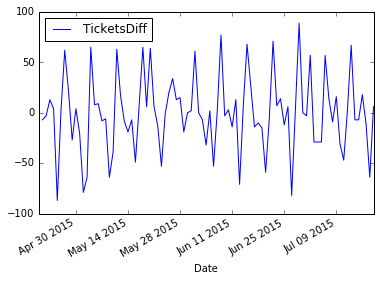

In [61]:
p2.plot(x= "Date", y = "TicketsDiff")

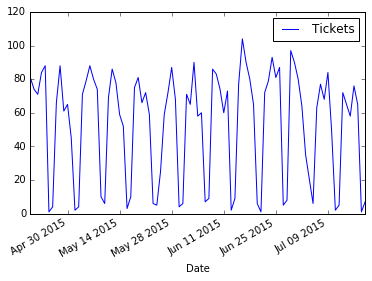

In [62]:
p2.plot(x= "Date", y = "Tickets")

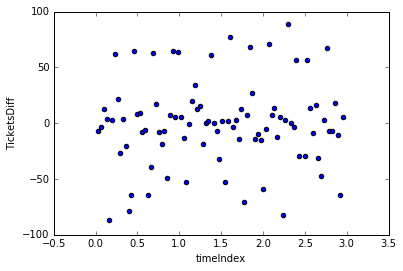

In [63]:
p2.plot(kind= "scatter", x= "timeIndex", y = "TicketsDiff")

In [64]:
p3 = p2.sort_values(by = "timeIndex")

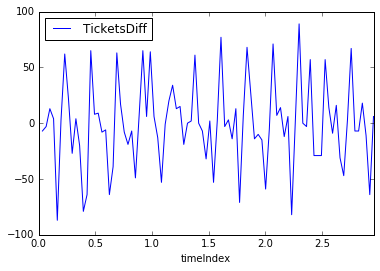

In [65]:
p3.plot(kind= "line", x= "timeIndex", y = "TicketsDiff")

In [66]:
pd.rolling_mean?

### Estimating Trend using Simple Moving Average

In [67]:
p3['TicketsSMA12'] = pd.rolling_mean(p3.Tickets, window = 8)

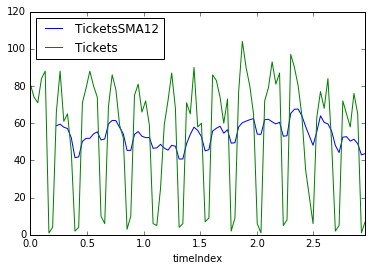

In [68]:
p3.plot(kind ="line",x= "timeIndex", y=["TicketsSMA12", "Tickets"])

In [69]:
p3.tail(8).mean()

Tickets          43.625000
timeIndex         2.841947
TicketsShift1    43.000000
TicketsDiff       0.625000
TicketsSMA12     48.359375
dtype: float64

In [70]:
def adf(ts):
    
    # Determing rolling statistics
    rolmean = pd.rolling_mean(ts, window=12)
    rolstd = pd.rolling_std(ts, window=12)

    #Plot rolling statistics:
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Calculate ADF factors
    adftest = adfuller(ts, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    return adfoutput

In [71]:
p3.tail()

,Date,Tickets,timeIndex,TicketsShift1,TicketsDiff,TicketsSMA12
39,2015-07-15,58,2.825520,65,-7,50.375
49,2015-07-16,76,2.858375,58,18,51.375
89,2015-07-17,65,2.891230,76,-11,49.000
74,2015-07-18,1,2.924085,65,-64,43.000
63,2015-07-19,7,2.956940,1,6,43.625


In [72]:
p3.Tickets.tail(8).mean()

43.625

In [73]:
p4 = p3.set_index("timeIndex")

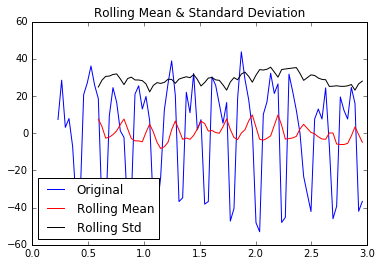

Test Statistic                 -4.072121
p-value                         0.001077
# of Lags Used                  7.000000
Number of Observations Used    75.000000
Critical Value (5%)            -2.900925
Critical Value (10%)           -2.587781
Critical Value (1%)            -3.520713
dtype: float64

In [74]:
ts = p4.Tickets - p4.TicketsSMA12
ts.dropna(inplace = True)
adf(ts)

### Comments : 

If we look at the P-value , it is 0.001077. From this adf test we can confirm that the obtained series after applying the SMA is a stationary series and we can safely forcast the mean , which in this case comes to be 43.625

Let us forecast also by considering other advanced model like ARIMA & see how the model predicts .

### First Difference contd..

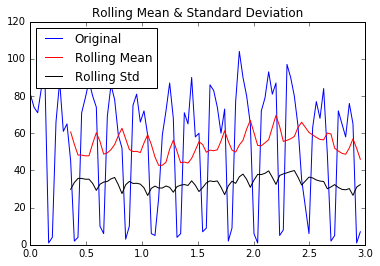

Test Statistic                 -2.263938
p-value                         0.183863
# of Lags Used                  6.000000
Number of Observations Used    83.000000
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
Critical Value (1%)            -3.511712
dtype: float64

In [75]:
ts = p4.Tickets
ts.dropna(inplace = True)
adf(ts)

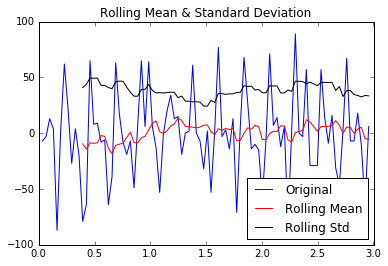

Test Statistic                 -2.742482
p-value                         0.066971
# of Lags Used                  6.000000
Number of Observations Used    82.000000
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
Critical Value (1%)            -3.512738
dtype: float64

In [76]:
ts = p4.TicketsDiff
ts.dropna(inplace = True)
adf(ts)

### Second Difference

If we see the P-value from the adf test , we see that it is greater than our significance value  ( 0.05 < 0.066971)  and thus we need one more differencing to make it a stationary model . 

In [77]:
p3["TicketsDiffShift1"] = p3.TicketsDiff.shift()
p3["TicketsDiff2"] = p3.TicketsDiff - p3.TicketsDiffShift1

In [78]:
p3.head()

,Date,Tickets,timeIndex,TicketsShift1,TicketsDiff,TicketsSMA12,TicketsDiffShift1,TicketsDiff2
79,2015-04-20,81,0.000000,NaN,NaN,NaN,NaN,NaN
29,2015-04-21,74,0.032855,81,-7,NaN,NaN,NaN
75,2015-04-22,71,0.065710,74,-3,NaN,-7,4
80,2015-04-23,84,0.098565,71,13,NaN,-3,16
45,2015-04-24,88,0.131420,84,4,NaN,13,-9


In [79]:
p4 = p3.set_index("timeIndex")

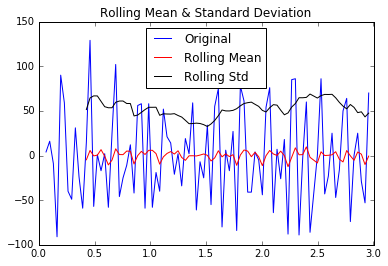

Test Statistic                -1.464764e+01
p-value                        3.541572e-27
# of Lags Used                 5.000000e+00
Number of Observations Used    8.200000e+01
Critical Value (5%)           -2.897490e+00
Critical Value (10%)          -2.585949e+00
Critical Value (1%)           -3.512738e+00
dtype: float64

In [80]:
ts = p4.TicketsDiff2
ts.dropna(inplace = True)
adf(ts)

If we see the p-value after second difference we see it is far too less than our significance level and thus we can safely reject the null hypothesis hence making our model a stationary time series . 

In [179]:
p7 = p3.set_index("Date")

In [180]:
ts = p7.Tickets.astype(np.float)
ts_diff = p7.TicketsDiff2
ts_diff.dropna(inplace = True)

In [181]:
from statsmodels.tsa.stattools import acf, pacf

In [182]:
lag_acf = acf(ts_diff, nlags=40)

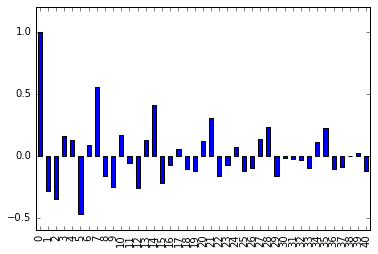

In [183]:
ACF = pd.Series(lag_acf)
ACF.head()
ACF.plot(kind = "bar")

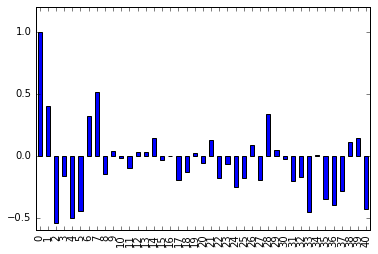

In [184]:
lag_pacf = pacf(ts, nlags=40, method='ols')
PACF = pd.Series(lag_pacf)
PACF.head()
PACF.plot(kind = "bar")

In [185]:
from statsmodels.tsa.arima_model import ARIMA

In [186]:
ts_diff.head()

Date
2015-04-22     4
2015-04-23    16
2015-04-24    -9
2015-04-25   -91
2015-04-26    90
Name: TicketsDiff2, dtype: float64

In [254]:
model_AR1MA = ARIMA(ts_diff, order=(2,0,0))

In [255]:
results_ARIMA = model_AR1MA.fit(disp = -1)

In [256]:
results_ARIMA.fittedvalues

Date
2015-04-22    -0.145309
2015-04-23    -1.320606
2015-04-24    -8.832155
2015-04-25    -4.057967
2015-04-26    41.920587
2015-04-27     5.056552
2015-04-28   -67.280570
2015-04-29   -11.384963
2015-04-30    39.006543
2015-05-01     9.879156
2015-05-02    -4.867939
2015-05-03    35.640034
2015-05-04    21.263470
2015-05-05   -61.145260
2015-05-06   -37.270589
2015-05-07    26.160550
2015-05-08     6.345069
2015-05-09     6.899946
2015-05-10    22.974660
2015-05-11    16.621485
2015-05-12   -54.594716
2015-05-13   -29.139203
2015-05-14    31.822916
2015-05-15    16.090815
2015-05-16    -0.097478
2015-05-17    11.590346
2015-05-18    -3.845702
2015-05-19   -50.846492
2015-05-20    -2.989171
2015-05-21     3.328612
                ...    
2015-06-19    17.371875
2015-06-20    -0.073271
2015-06-21    20.433019
2015-06-22    -2.069347
2015-06-23   -57.411932
2015-06-24    -9.383304
2015-06-25    26.955627
2015-06-26     7.272349
2015-06-27     4.466301
2015-06-28    27.949946
2015-06-29 

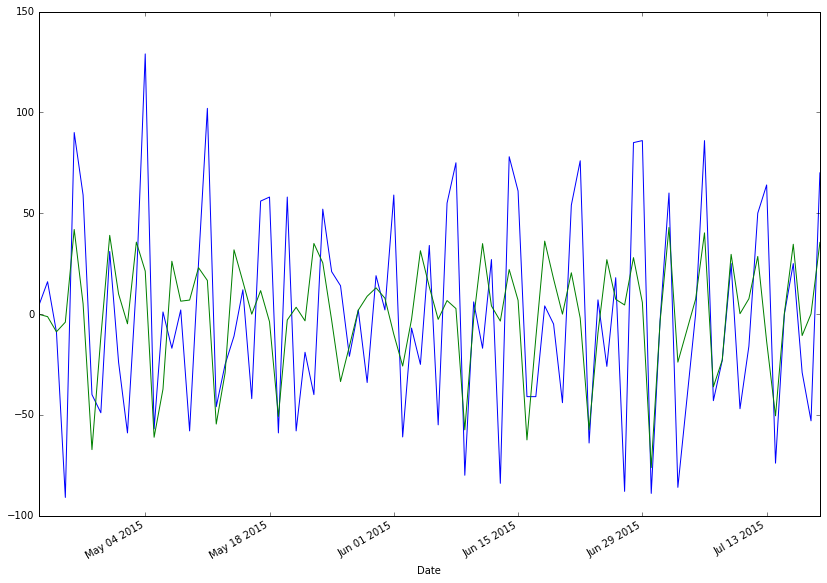

In [257]:
ts_diff.plot()
results_ARIMA.fittedvalues.plot( figsize = (14,10))

In [258]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

In [259]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [260]:
predictions_ARIMA_log = pd.Series(ts.ix[0], index=ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

In [261]:
p7['priceARIMA'] = predictions_ARIMA_log

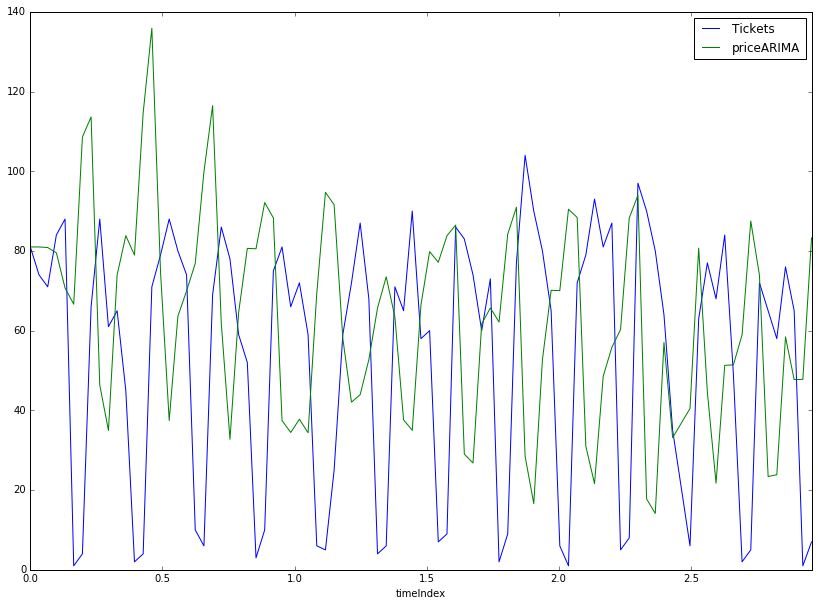

In [262]:
p7.plot(kind="line", x="timeIndex", y = ["Tickets", "priceARIMA"], figsize = (14,10))